In [8]:
import os
import numpy as np
import pandas as pd
import glob
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense,LSTM
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns
#sns.set(style="darkgrid")
from keras.models import load_model




In [9]:
path = os.getcwd()
files = os.listdir(path)
files,path


(['.git',
  '.ipynb_checkpoints',
  'environment.txt',
  'Fault_pred-v3-TS.ipynb',
  'Fault_pred.ipynb',
  'lstm_v1.h5',
  'README.md'],
 'D:\\Projects\\Research\\Fault Prediction\\Electric-Fault-Prediction')

In [18]:
with open('environment.txt') as environment:
    path2 = environment.readline()

In [3]:
# path =r'D:\Projects\Datasets\Fault prediction\Electricity Log\2018\LOG REPORT APRIL 2018\01.04.18'
# allFiles = glob.glob(path + "/*.xls")
# allFiles

['D:\\Neat\\Electricity Data\\2018\\LOG REPORT APRIL 2018\\01.04.18\\South-1.xls',
 'D:\\Neat\\Electricity Data\\2018\\LOG REPORT APRIL 2018\\01.04.18\\SOUTH-3.xls',
 'D:\\Neat\\Electricity Data\\2018\\LOG REPORT APRIL 2018\\01.04.18\\South-II.xls',
 'D:\\Neat\\Electricity Data\\2018\\LOG REPORT APRIL 2018\\01.04.18\\West .xls']

## Storing path of data in a list

In [19]:
# path2 = r'D:\Neat\Electricity Data\2018\LOG REPORT APRIL 2018'
allf = glob.glob(path2 + "\\*\\*.xls")
allf

['D:\\Projects\\Datasets\\Fault prediction\\Electricity Log\\2018\\LOG REPORT APRIL 2018\\01.04.18\\South-1.xls',
 'D:\\Projects\\Datasets\\Fault prediction\\Electricity Log\\2018\\LOG REPORT APRIL 2018\\01.04.18\\SOUTH-3.xls',
 'D:\\Projects\\Datasets\\Fault prediction\\Electricity Log\\2018\\LOG REPORT APRIL 2018\\01.04.18\\South-II.xls',
 'D:\\Projects\\Datasets\\Fault prediction\\Electricity Log\\2018\\LOG REPORT APRIL 2018\\01.04.18\\West .xls',
 'D:\\Projects\\Datasets\\Fault prediction\\Electricity Log\\2018\\LOG REPORT APRIL 2018\\02.04.18\\South-1.xls',
 'D:\\Projects\\Datasets\\Fault prediction\\Electricity Log\\2018\\LOG REPORT APRIL 2018\\02.04.18\\SOUTH-3.xls',
 'D:\\Projects\\Datasets\\Fault prediction\\Electricity Log\\2018\\LOG REPORT APRIL 2018\\02.04.18\\South-II.xls',
 'D:\\Projects\\Datasets\\Fault prediction\\Electricity Log\\2018\\LOG REPORT APRIL 2018\\02.04.18\\West .xls',
 'D:\\Projects\\Datasets\\Fault prediction\\Electricity Log\\2018\\LOG REPORT APRIL 2018\\

## Loading data in a DataFrame

In [20]:
all_data = pd.DataFrame()
for f in allf:
    df = pd.read_excel(f,'ALL',header=None)
    if f[-12:]=='South-II.xls':
        all_data = all_data.append(df[2:],ignore_index=True)
    else:
        all_data = all_data.append(df[1:],ignore_index=True)

In [21]:
all_data.iloc[5575:,100:]
all_data.iloc[:,:]

,0,1,2,3,4,5,6,7,8,9,...,98,99,100,101,102,103,104,105,106,107
0,2018-04-01 00:00:00,DEFENCE COLONY,NaN,NaN,NaN,NaN,NaN,NaN,Battery,AMPs,...,18.07,18.0395,18.07,18.0395,18.07,18.07,18.07,18.07,18.1005,2018-04-01 03:00:00
1,2018-04-01 00:00:00,DEFENCE COLONY,NaN,NaN,NaN,NaN,NaN,NaN,Battery,Volts,...,55.5559,55.5559,55.5559,55.5559,55.5559,55.5559,55.5559,55.5559,55.739,2018-04-01 05:00:00
2,2018-04-01 00:00:00,DEFENCE COLONY,NaN,NaN,NaN,NaN,NaN,NaN,NEHRU STADIUM CKT-1,AMPs,...,82.1061,79.3323,79.4924,78.8581,77.7402,77.7402,77.7402,77.7402,86.7252,2018-04-01 20:00:00
3,2018-04-01 00:00:00,DEFENCE COLONY,NaN,NaN,NaN,NaN,NaN,NaN,NEHRU STADIUM CKT-1,KV,...,32.9722,32.8967,33.0952,32.9921,32.9902,32.9902,32.9902,32.9902,33.8179,2018-04-01 04:00:00
4,2018-04-01 00:00:00,DEFENCE COLONY,NaN,NaN,NaN,NaN,NaN,NaN,NEHRU STADIUM CKT-1,PF,...,-0.972117,-0.973337,-0.972156,-0.973869,-0.9742,-0.9742,-0.9742,-0.9742,-0.960099,2018-04-01 07:15:00
5,2018-04-01 00:00:00,DEFENCE COLONY,NaN,NaN,NaN,NaN,NaN,NaN,LODHI ROAD CKT 2,AMPs,...,115.547,111.142,112.562,108.438,103.732,103.732,103.732,103.732,118.547,2018-04-01 19:15:00
6,2018-04-01 00:00:00,DEFENCE COLONY,NaN,NaN,NaN,NaN,NaN,NaN,LODHI ROAD CKT 2,KV,...,33.6948,33.8581,33.705,33.7871,33.8087,33.8087,33.8087,33.8087,34.5499,2018-04-01 04:00:00
7,2018-04-01 00:00:00,DEFENCE COLONY,NaN,NaN,NaN,NaN,NaN,NaN,LODHI ROAD CKT 2,PF,...,-0.97089,-0.973057,-0.972709,-0.974297,-0.974874,-0.974874,-0.974874,-0.974874,-0.960243,2018-04-01 06:00:00
8,2018-04-01 00:00:00,DEFENCE COLONY,NaN,NaN,NaN,NaN,NaN,NaN,KILOKARI-RKP1,AMPs,...,6e-06,0,0,0,0,0,0,0,6e-06,2018-04-01 14:30:00
9,2018-04-01 00:00:00,DEFENCE COLONY,NaN,NaN,NaN,NaN,NaN,NaN,KILOKARI-RKP1,KV,...,33.3494,33.4183,33.3949,33.5149,33.5127,33.5127,33.5127,33.5127,34.2904,2018-04-01 04:00:00


In [7]:
#removing useless columns
all_data = all_data.drop(all_data.columns[list(range(8))], axis=1)


In [8]:
all_data = all_data.drop(all_data.columns[[-1]], axis=1)

In [9]:
all_data

,8,9,10,11,12,13,14,15,16,17,...,97,98,99,100,101,102,103,104,105,106
0,Battery,AMPs,18.07,18.07,18.07,18.07,18.07,18.07,18.07,18.07,...,18.07,18.07,18.0395,18.07,18.0395,18.07,18.07,18.07,18.07,18.1005
1,Battery,Volts,55.7085,55.7085,55.7085,55.7085,55.678,55.678,55.678,55.678,...,55.5559,55.5559,55.5559,55.5559,55.5559,55.5559,55.5559,55.5559,55.5559,55.739
2,NEHRU STADIUM CKT-1,AMPs,67.4318,67.4318,67.4318,67.4318,62.8372,62.8372,62.8372,62.8372,...,82.1061,82.1061,79.3323,79.4924,78.8581,77.7402,77.7402,77.7402,77.7402,86.7252
3,NEHRU STADIUM CKT-1,KV,33.4386,33.4386,33.4386,33.4386,33.6646,33.6646,33.6646,33.6646,...,32.9722,32.9722,32.8967,33.0952,32.9921,32.9902,32.9902,32.9902,32.9902,33.8179
4,NEHRU STADIUM CKT-1,PF,-0.971486,-0.971486,-0.971486,-0.971486,-0.968248,-0.968248,-0.968248,-0.968248,...,-0.972117,-0.972117,-0.973337,-0.972156,-0.973869,-0.9742,-0.9742,-0.9742,-0.9742,-0.960099
5,LODHI ROAD CKT 2,AMPs,94.3767,94.3767,94.3767,94.3767,86.0927,86.0927,86.0927,86.0927,...,115.547,115.547,111.142,112.562,108.438,103.732,103.732,103.732,103.732,118.547
6,LODHI ROAD CKT 2,KV,33.9267,33.9267,33.9267,33.9267,34.1017,34.1017,34.1017,34.1017,...,33.6948,33.6948,33.8581,33.705,33.7871,33.8087,33.8087,33.8087,33.8087,34.5499
7,LODHI ROAD CKT 2,PF,-0.9729,-0.9729,-0.9729,-0.9729,-0.973317,-0.973317,-0.973317,-0.973317,...,-0.97089,-0.97089,-0.973057,-0.972709,-0.974297,-0.974874,-0.974874,-0.974874,-0.974874,-0.960243
8,KILOKARI-RKP1,AMPs,0,0,0,0,0,0,0,0,...,6e-06,6e-06,0,0,0,0,0,0,0,6e-06
9,KILOKARI-RKP1,KV,33.6809,33.6809,33.6809,33.6809,33.8382,33.8382,33.8382,33.8382,...,33.3494,33.3494,33.4183,33.3949,33.5149,33.5127,33.5127,33.5127,33.5127,34.2904


In [10]:
#amp_data = all_data.loc[all_data[9]=='AMPs']

In [11]:
#amp_data = amp_data.drop([9], axis=1)

In [12]:
#amp_data

## Selecting only Ampere values 

In [29]:
amp_data = all_data.loc[all_data[9]=='AMPs']

In [30]:
amp_data = amp_data.loc[(amp_data[106] >= 1)]

In [31]:
amp_data

,8,9,10,11,12,13,14,15,16,17,...,97,98,99,100,101,102,103,104,105,106
0,Battery,AMPs,18.07,18.07,18.07,18.07,18.07,18.07,18.07,18.07,...,18.07,18.07,18.0395,18.07,18.0395,18.07,18.07,18.07,18.07,18.1005
2,NEHRU STADIUM CKT-1,AMPs,67.4318,67.4318,67.4318,67.4318,62.8372,62.8372,62.8372,62.8372,...,82.1061,82.1061,79.3323,79.4924,78.8581,77.7402,77.7402,77.7402,77.7402,86.7252
5,LODHI ROAD CKT 2,AMPs,94.3767,94.3767,94.3767,94.3767,86.0927,86.0927,86.0927,86.0927,...,115.547,115.547,111.142,112.562,108.438,103.732,103.732,103.732,103.732,118.547
11,NEHRU STADIUM CKT-2,AMPs,96.7379,96.7379,96.7379,96.7379,92.6358,92.6358,92.6358,92.6358,...,135.979,111.401,112.483,135.806,111.327,111.648,111.648,111.648,111.648,139.587
14,HV1,AMPs,66.709,66.709,66.709,66.709,62.6696,62.6696,62.6696,62.6696,...,81.7924,81.7924,79.2024,79.3484,78.743,76.9875,76.9875,76.9875,76.9875,86.6564
19,HV2,AMPs,94.1642,94.1642,94.1642,94.1642,85.7256,85.7256,85.7256,85.7256,...,115.79,115.79,110.899,112.018,108.673,103.402,103.402,103.402,103.402,118.582
24,HV3,AMPs,96.9262,96.9262,96.9262,96.9262,92.7358,92.7358,92.7358,92.7358,...,135.938,135.938,112.898,136.573,111.429,110.853,110.853,110.853,110.853,139.903
29,LV1,AMPs,205.328,205.328,205.328,205.328,194.598,194.598,194.598,194.598,...,252.464,252.464,245.262,246.209,241.2,235.423,235.423,235.423,235.423,267.266
32,LV2,AMPs,285.059,285.059,285.059,285.059,258.202,258.202,258.202,258.202,...,348.621,348.621,337.09,341.56,327.375,313.522,313.522,313.522,313.522,356.126
35,LV3,AMPs,295.783,295.783,295.783,295.783,280.573,280.573,280.573,280.573,...,408.744,408.744,339.406,410.957,338.092,335.795,335.795,335.795,335.795,423.175


In [32]:
amp_data = amp_data.drop(amp_data.columns[[1,-1]], axis=1)
amp_data.columns = range(amp_data.shape[1])
amp_data

,0,1,2,3,4,5,6,7,8,9,...,87,88,89,90,91,92,93,94,95,96
0,Battery,18.07,18.07,18.07,18.07,18.07,18.07,18.07,18.07,18.07,...,18.07,18.07,18.07,18.0395,18.07,18.0395,18.07,18.07,18.07,18.07
2,NEHRU STADIUM CKT-1,67.4318,67.4318,67.4318,67.4318,62.8372,62.8372,62.8372,62.8372,61.2509,...,82.1061,82.1061,82.1061,79.3323,79.4924,78.8581,77.7402,77.7402,77.7402,77.7402
5,LODHI ROAD CKT 2,94.3767,94.3767,94.3767,94.3767,86.0927,86.0927,86.0927,86.0927,83.0739,...,115.547,115.547,115.547,111.142,112.562,108.438,103.732,103.732,103.732,103.732
11,NEHRU STADIUM CKT-2,96.7379,96.7379,96.7379,96.7379,92.6358,92.6358,92.6358,92.6358,87.4836,...,135.979,135.979,111.401,112.483,135.806,111.327,111.648,111.648,111.648,111.648
14,HV1,66.709,66.709,66.709,66.709,62.6696,62.6696,62.6696,62.6696,61.1026,...,81.7924,81.7924,81.7924,79.2024,79.3484,78.743,76.9875,76.9875,76.9875,76.9875
19,HV2,94.1642,94.1642,94.1642,94.1642,85.7256,85.7256,85.7256,85.7256,82.7303,...,115.79,115.79,115.79,110.899,112.018,108.673,103.402,103.402,103.402,103.402
24,HV3,96.9262,96.9262,96.9262,96.9262,92.7358,92.7358,92.7358,92.7358,87.3894,...,135.938,135.938,135.938,112.898,136.573,111.429,110.853,110.853,110.853,110.853
29,LV1,205.328,205.328,205.328,205.328,194.598,194.598,194.598,194.598,187.199,...,252.464,252.464,252.464,245.262,246.209,241.2,235.423,235.423,235.423,235.423
32,LV2,285.059,285.059,285.059,285.059,258.202,258.202,258.202,258.202,251.923,...,348.621,348.621,348.621,337.09,341.56,327.375,313.522,313.522,313.522,313.522
35,LV3,295.783,295.783,295.783,295.783,280.573,280.573,280.573,280.573,263.026,...,408.744,408.744,408.744,339.406,410.957,338.092,335.795,335.795,335.795,335.795


In [35]:
ts_frame = pd.DataFrame(set(amp_data[0]))

In [82]:
 feeder = set(amp_data[0])
    

In [84]:
final_ts = pd.DataFrame([])
for f in feeder:
    df = amp_data.loc[amp_data[0]==f]
    df = df.drop(df.columns[[0]], axis=1)
    df.index = df.index + 1
    df_out = df.stack()
    dff = df_out.to_frame().T
    dff.columns = range(dff.shape[1])
    dff.insert(0, 'Feeder', f)
    final_ts = final_ts.append(dff)
    

In [85]:
final_ts


,Feeder,0,1,2,3,4,5,6,7,8,...,119414,119415,119416,119417,119418,119419,119420,119421,119422,119423
0,CWC SS,34.4849,34.4849,34.4849,34.4849,34.5144,34.5144,34.5144,34.5144,34.9337,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,220KV SARITA VIHAR,82.55,82.55,82.55,82.55,79.5232,79.5232,79.5232,79.5232,79.5232,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,L BLK M NGR,59.7437,59.7437,59.7437,59.7437,57.5593,57.5593,57.5593,57.5593,51.5482,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,I/C TRAUMA CENTRE,107.604,107.604,107.604,107.604,108.766,108.766,108.766,108.766,106.089,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,BATTERY,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,MATHURA RD CKT-1,97.5027,97.5027,97.5027,97.5027,95.2299,95.2299,95.2299,95.2299,91.5323,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,I/C OKHALA CKT-2,136.919,136.919,136.919,136.919,129.468,129.468,129.468,129.468,122.686,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,CHIRAG DELHI KIOSK,52.7288,52.7288,52.7288,52.7288,48.4462,48.4462,48.4462,48.4462,47.7726,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,B 26 OKHLA PH-1,19.9228,19.9228,19.9228,19.9228,19.4372,19.4372,19.4372,19.4372,20.1231,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,A-B/C DEF. COL.,22.7995,22.7995,22.7995,22.7995,22.9299,22.9299,22.9299,22.9299,23.5102,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [80]:
df.index = df.index + 1
df_out = df.stack()

dff = df_out.to_frame().T
dff.columns = range(dff.shape[1])



,0,1,2,3,4,5,6,7,8,9,...,2870,2871,2872,2873,2874,2875,2876,2877,2878,2879
0,34.4849,34.4849,34.4849,34.4849,34.5144,34.5144,34.5144,34.5144,34.9337,34.9337,...,88.2134,88.2134,88.2134,97.16,97.16,97.16,95.6576,95.6576,95.6576,95.6576


In [81]:
dff.insert(0, 'Feeder', list(feeder)[0])
dff

,Feeder,0,1,2,3,4,5,6,7,8,...,2870,2871,2872,2873,2874,2875,2876,2877,2878,2879
0,CWC SS,34.4849,34.4849,34.4849,34.4849,34.5144,34.5144,34.5144,34.5144,34.9337,...,88.2134,88.2134,88.2134,97.16,97.16,97.16,95.6576,95.6576,95.6576,95.6576


In [36]:
ts_frame

,0
0,CWC SS
1,220KV SARITA VIHAR
2,L BLK M NGR
3,I/C TRAUMA CENTRE
4,BATTERY
5,MATHURA RD CKT-1
6,I/C OKHALA CKT-2
7,CHIRAG DELHI KIOSK
8,B 26 OKHLA PH-1
9,A-B/C DEF. COL.


In [37]:
ts_frame.merge(amp_data, how='left')

,0,1,2,3,4,5,6,7,8,9,...,87,88,89,90,91,92,93,94,95,96
0,CWC SS,34.4849,34.4849,34.4849,34.4849,34.5144,34.5144,34.5144,34.5144,34.9337,...,39.1131,39.1131,39.1131,39.2815,39.2815,39.2815,38.7228,38.7228,38.7228,38.7228
1,CWC SS,36.6256,36.6256,36.6256,36.6256,36.6151,36.6151,36.6151,36.6151,34.4436,...,55.5496,55.5496,55.5496,51.7002,51.7002,51.7002,45.3185,45.3185,45.3185,45.3185
2,CWC SS,41.888,41.888,41.888,41.888,40.961,40.961,40.961,40.961,37.286,...,53.4562,53.4562,53.4562,55.2555,55.2555,55.2555,54.6688,54.6688,54.6688,54.6688
3,CWC SS,45.4644,45.4644,45.4644,45.4644,42.9909,42.9909,42.9909,42.9909,42.5564,...,56.2229,56.2229,56.2229,64.3307,64.3307,64.3307,60.389,60.389,60.389,60.389
4,CWC SS,56.1364,56.1364,56.1364,56.1364,47.8507,47.8507,47.8507,47.8507,47.2128,...,59.3695,59.3695,59.3695,62.7715,62.7715,62.7715,64.6732,64.6732,64.6732,64.6732
5,CWC SS,60.8741,60.8741,60.8741,60.8741,54.9212,54.9212,54.9212,54.9212,48.5858,...,51.234,51.234,51.234,51.5464,51.5464,51.5464,47.0531,47.0531,47.0531,47.0531
6,CWC SS,44.3574,44.3574,44.3574,44.3574,46.5983,46.5983,46.5983,46.5983,48.085,...,51.6161,51.6161,51.6161,55.8238,55.8238,55.8238,53.6172,53.6172,53.6172,53.6172
7,CWC SS,52.862,52.862,52.862,52.862,52.5202,52.5202,52.5202,52.5202,49.5475,...,46.9256,46.9256,46.9256,56.1766,56.1766,58.9501,53.6187,53.6187,53.6187,53.6187
8,CWC SS,55.5764,55.5764,55.5764,55.5764,53.2648,53.2648,53.2648,53.2648,53.6017,...,50.2478,50.2478,50.2478,60.4193,60.4193,60.4193,56.0688,56.0688,56.0688,56.0688
9,CWC SS,45.3339,45.3339,45.3339,45.3339,47.0678,47.0678,47.0678,47.0678,39.9512,...,56.0965,56.0965,56.0965,54.3812,54.3812,54.3812,51.2247,51.2247,51.2247,51.2247


In [27]:
mask = [False]*len(amp_data)
for i in amp_data.columns:
    t=amp_data[i].apply(lambda x: x == 0)
    mask = mask and list(t)

In [19]:
len(amp_data)

28176

In [20]:
mask

[False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 True,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,

In [21]:
# fault = amp_data[mask]

## Selecting the grids where fault occured

In [22]:
fault = amp_data[(amp_data[amp_data.columns] == 0).any(axis = 1)]


In [23]:
fault = fault.reset_index(drop = True)
fault

,10,11,12,13,14,15,16,17,18,19,...,96,97,98,99,100,101,102,103,104,105
0,0,0,0,0,0,0,0,0,0,0,...,310.192,310.192,310.192,310.685,310.833,0,0,0,0,309.656
1,60.1535,60.1535,58.3657,58.3657,58.3657,58.3657,54.4073,54.4073,54.4073,54.4073,...,72.243,68.9422,70.37,70.1896,69.2486,69.2486,69.2486,69.2486,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0.000993,0.000993,0.000993,0,0,0,0
3,23.0097,23.0097,23.0097,23.0097,20.5581,20.5581,20.5581,20.5581,21.4462,21.4462,...,0,0,0,0,0,0,0,0,0,0
4,0.573741,0.573741,0.071234,2.32273,0.085104,0.085104,0.085104,0.085104,1.509,1.509,...,1.35554,1.35554,1.35554,0,0,0,0,0,0,0
5,0.497328,0.497328,0.497328,0.497328,0.497328,0.497328,0.497328,0.497328,0.497328,0.497328,...,0.321361,0.321361,0.321361,0,0,0,0,0,0,0
6,5.75694,5.75694,5.78331,5.78331,5.34614,5.34614,5.34614,5.34614,5.45497,5.45497,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,1,0,0,0,0
8,2.304,2.304,2.304,2.304,2.304,2.304,2.304,2.304,2.328,2.328,...,2.032,2.032,2.032,2.384,2.384,2.384,2.384,2.384,2.384,2.384
9,6.00604,6.00604,6.00604,6.00604,6.00604,6.00604,6.00604,6.00604,6.00604,6.00604,...,6.00604,6.00604,6.00604,5.97552,5.97552,6.00604,5.97552,5.97552,5.97552,5.97552


In [24]:
invmask = [not i for i in mask]

In [25]:
# noFault = amp_data[invmask]
amp_data.columns

Int64Index([ 10,  11,  12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,
             23,  24,  25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,
             36,  37,  38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,
             49,  50,  51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,
             62,  63,  64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,
             75,  76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,
             88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100,
            101, 102, 103, 104, 105],
           dtype='int64')

## Selecting the grids with No fault

In [26]:
noFault = amp_data[(amp_data[amp_data.columns] != 0).all(axis = 1)]


In [27]:
noFault = noFault.reset_index(drop = True)
noFault

,10,11,12,13,14,15,16,17,18,19,...,96,97,98,99,100,101,102,103,104,105
0,18.07,18.07,18.07,18.07,18.07,18.07,18.07,18.07,18.07,18.07,...,18.07,18.07,18.07,18.0395,18.07,18.0395,18.07,18.07,18.07,18.07
1,67.4318,67.4318,67.4318,67.4318,62.8372,62.8372,62.8372,62.8372,61.2509,61.2509,...,82.1061,82.1061,82.1061,79.3323,79.4924,78.8581,77.7402,77.7402,77.7402,77.7402
2,94.3767,94.3767,94.3767,94.3767,86.0927,86.0927,86.0927,86.0927,83.0739,83.0739,...,115.547,115.547,115.547,111.142,112.562,108.438,103.732,103.732,103.732,103.732
3,96.7379,96.7379,96.7379,96.7379,92.6358,92.6358,92.6358,92.6358,87.4836,87.4836,...,135.979,135.979,111.401,112.483,135.806,111.327,111.648,111.648,111.648,111.648
4,66.709,66.709,66.709,66.709,62.6696,62.6696,62.6696,62.6696,61.1026,61.1026,...,81.7924,81.7924,81.7924,79.2024,79.3484,78.743,76.9875,76.9875,76.9875,76.9875
5,94.1642,94.1642,94.1642,94.1642,85.7256,85.7256,85.7256,85.7256,82.7303,82.7303,...,115.79,115.79,115.79,110.899,112.018,108.673,103.402,103.402,103.402,103.402
6,96.9262,96.9262,96.9262,96.9262,92.7358,92.7358,92.7358,92.7358,87.3894,87.3894,...,135.938,135.938,135.938,112.898,136.573,111.429,110.853,110.853,110.853,110.853
7,205.328,205.328,205.328,205.328,194.598,194.598,194.598,194.598,187.199,187.199,...,252.464,252.464,252.464,245.262,246.209,241.2,235.423,235.423,235.423,235.423
8,285.059,285.059,285.059,285.059,258.202,258.202,258.202,258.202,251.923,251.923,...,348.621,348.621,348.621,337.09,341.56,327.375,313.522,313.522,313.522,313.522
9,295.783,295.783,295.783,295.783,280.573,280.573,280.573,280.573,263.026,263.026,...,408.744,408.744,408.744,339.406,410.957,338.092,335.795,335.795,335.795,335.795


In [28]:
# Creating a random array to select randomly few NoFault rows 
randnos = np.random.randint(0,len(noFault),len(fault))
randnos = randnos.tolist()

In [29]:
randnos

[2453,
 3805,
 1633,
 10578,
 11472,
 5408,
 4559,
 8153,
 9574,
 23295,
 21135,
 11553,
 21179,
 21250,
 22729,
 24007,
 4457,
 4332,
 12178,
 16432,
 11617,
 20717,
 20119,
 1923,
 14985,
 16908,
 4971,
 8612,
 18108,
 10984,
 9560,
 13268,
 20679,
 20999,
 18641,
 14316,
 19881,
 163,
 17362,
 5639,
 21565,
 16167,
 10219,
 7999,
 6727,
 19951,
 10283,
 8490,
 17806,
 21788,
 16303,
 20889,
 8172,
 21112,
 2551,
 9139,
 13816,
 14757,
 14982,
 14637,
 21367,
 8462,
 5987,
 22880,
 3442,
 20493,
 9483,
 18429,
 5057,
 5254,
 12943,
 14263,
 132,
 13228,
 18769,
 8314,
 10810,
 16449,
 20937,
 5133,
 10323,
 5891,
 3766,
 1581,
 1940,
 12798,
 6529,
 11328,
 6889,
 1523,
 8738,
 15276,
 12044,
 4733,
 1610,
 13882,
 1741,
 7502,
 19031,
 12069,
 6059,
 9840,
 5453,
 8495,
 18320,
 15218,
 19132,
 21470,
 4721,
 20022,
 22278,
 21417,
 16279,
 5067,
 17265,
 2559,
 21426,
 14708,
 6964,
 22620,
 16105,
 21226,
 5982,
 8504,
 6012,
 8041,
 7613,
 4009,
 15174,
 6673,
 24293,
 6183,
 780

### Reduced NoFault dataframe having same shape of Fault df

In [30]:
 noFF = noFault.iloc[randnos]

In [31]:
noFF = noFF.reset_index(drop = True)
noFF

,10,11,12,13,14,15,16,17,18,19,...,96,97,98,99,100,101,102,103,104,105
0,67.465,67.465,67.465,67.465,63.5246,63.5246,63.5246,63.5246,55.8011,55.8011,...,102.478,102.478,102.478,92.443,92.443,92.443,80.5181,80.5181,80.5181,80.5181
1,83.2053,83.2053,83.2053,83.2053,69.1452,69.1452,69.1452,69.1452,69.5606,69.5606,...,89.1579,89.1579,89.1579,98.5592,98.5592,98.5592,96.6967,96.6967,96.6967,96.6967
2,22.5228,22.5228,22.5228,22.5228,21.4247,21.4247,21.4247,21.4247,20.7353,20.7353,...,31.0215,31.0215,31.0215,29.0142,29.0142,29.0142,28.2008,28.2008,28.2008,28.2008
3,114.61,114.61,114.61,114.61,109.04,109.04,109.04,109.04,102.059,102.059,...,129.133,129.133,125.634,125.634,125.634,125.634,129.963,129.963,129.963,129.963
4,89.432,89.432,89.432,89.432,90.448,90.448,90.448,90.448,86.544,86.544,...,85.224,85.224,85.224,91.328,91.328,91.328,98.08,98.08,98.08,98.08
5,38.4823,38.4823,38.4823,38.4823,36.2835,36.2835,36.2835,36.2835,35.4998,35.4998,...,55.8464,55.8464,55.8464,55.3825,55.3825,55.3825,55.4597,55.4597,55.4597,55.4597
6,34.1471,34.1471,34.1471,34.1471,34.1471,34.1471,34.1471,34.1471,34.1471,34.1471,...,34.1471,34.1471,34.1471,34.1471,34.1471,34.1471,34.1471,34.1471,34.1471,34.1471
7,19.396,19.396,19.396,19.396,19.396,19.396,19.396,19.396,19.4144,19.396,...,19.3777,19.3777,19.3777,19.396,19.396,19.396,19.3777,19.3777,19.3777,19.3777
8,93.9918,93.9918,93.9918,93.9918,95.6363,95.6363,95.6363,95.6363,93.5825,93.5825,...,118.401,118.401,118.401,101.516,101.516,101.516,97.1064,97.1064,97.1064,97.1064
9,27.0451,27.0451,27.0451,27.0451,25.1969,25.1969,25.1969,25.1969,26.3614,26.3614,...,22.5581,22.5581,22.5581,22.0673,22.0673,22.0673,26.4736,26.4736,26.4736,26.4736


In [32]:
mask1 = [False]*len(fault)
for i in range(10,50):
    t=fault[i].apply(lambda x: x == 0)
    mask1 = mask1 and list(t)

In [33]:
mask1

[True,
 False,
 True,
 True,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 True,
 True,
 True,
 False,
 True,
 False,
 False,
 True,
 True,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 True,
 True,
 True,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 True,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 True,
 False,
 True,
 False,
 False,
 False,
 True,
 False,
 False,
 True,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,


In [34]:
invmask = [not i for i in mask1]
# Fault_2ndHalf = fault[invmask]

In [35]:
# Fault_2ndHalf

## Selecting those rows where fault occered in later half of the day

In [36]:
Fault_2ndHalf = fault[(fault[fault.columns[:40]] != 0).all(axis = 1)]
Fault_2ndHalf = Fault_2ndHalf.reset_index(drop = True)
Fault_2ndHalf

,10,11,12,13,14,15,16,17,18,19,...,96,97,98,99,100,101,102,103,104,105
0,60.1535,60.1535,58.3657,58.3657,58.3657,58.3657,54.4073,54.4073,54.4073,54.4073,...,72.243,68.9422,70.37,70.1896,69.2486,69.2486,69.2486,69.2486,0,0
1,0.573741,0.573741,0.071234,2.32273,0.085104,0.085104,0.085104,0.085104,1.509,1.509,...,1.35554,1.35554,1.35554,0,0,0,0,0,0,0
2,0.497328,0.497328,0.497328,0.497328,0.497328,0.497328,0.497328,0.497328,0.497328,0.497328,...,0.321361,0.321361,0.321361,0,0,0,0,0,0,0
3,5.75694,5.75694,5.78331,5.78331,5.34614,5.34614,5.34614,5.34614,5.45497,5.45497,...,0,0,0,0,0,0,0,0,0,0
4,2.304,2.304,2.304,2.304,2.304,2.304,2.304,2.304,2.328,2.328,...,2.032,2.032,2.032,2.384,2.384,2.384,2.384,2.384,2.384,2.384
5,144.274,144.274,144.274,144.274,137.053,137.053,137.053,137.053,132.157,132.157,...,3.97915,3.97915,3.97915,5.7236,5.7236,5.69064,5.58273,5.58273,5.58273,5.58273
6,250.056,250.056,250.056,250.056,239.637,239.637,239.637,239.637,230.146,230.146,...,278.203,278.203,278.203,277.842,277.842,266.256,267.262,267.262,267.262,267.262
7,143.533,143.533,143.533,143.533,136.298,136.298,136.298,136.298,131.724,131.724,...,0,0,0,0,0,0,0,0,0,0
8,97.2965,91.7534,91.7534,92.1144,92.1144,92.1144,92.1144,89.0059,89.0059,89.0059,...,257.395,257.395,0,0,0,0,0,0,0,0
9,78.7903,78.7903,78.7903,78.7903,74.9203,74.9203,74.9203,74.9203,73.1833,73.1833,...,102.979,102.979,102.979,89.2781,89.2781,89.2781,87.4727,87.4727,87.4727,87.4727


In [37]:

X_df = Fault_2ndHalf.append(noFF, ignore_index=True)
X_df

,10,11,12,13,14,15,16,17,18,19,...,96,97,98,99,100,101,102,103,104,105
0,60.1535,60.1535,58.3657,58.3657,58.3657,58.3657,54.4073,54.4073,54.4073,54.4073,...,72.243,68.9422,70.37,70.1896,69.2486,69.2486,69.2486,69.2486,0,0
1,0.573741,0.573741,0.071234,2.32273,0.085104,0.085104,0.085104,0.085104,1.509,1.509,...,1.35554,1.35554,1.35554,0,0,0,0,0,0,0
2,0.497328,0.497328,0.497328,0.497328,0.497328,0.497328,0.497328,0.497328,0.497328,0.497328,...,0.321361,0.321361,0.321361,0,0,0,0,0,0,0
3,5.75694,5.75694,5.78331,5.78331,5.34614,5.34614,5.34614,5.34614,5.45497,5.45497,...,0,0,0,0,0,0,0,0,0,0
4,2.304,2.304,2.304,2.304,2.304,2.304,2.304,2.304,2.328,2.328,...,2.032,2.032,2.032,2.384,2.384,2.384,2.384,2.384,2.384,2.384
5,144.274,144.274,144.274,144.274,137.053,137.053,137.053,137.053,132.157,132.157,...,3.97915,3.97915,3.97915,5.7236,5.7236,5.69064,5.58273,5.58273,5.58273,5.58273
6,250.056,250.056,250.056,250.056,239.637,239.637,239.637,239.637,230.146,230.146,...,278.203,278.203,278.203,277.842,277.842,266.256,267.262,267.262,267.262,267.262
7,143.533,143.533,143.533,143.533,136.298,136.298,136.298,136.298,131.724,131.724,...,0,0,0,0,0,0,0,0,0,0
8,97.2965,91.7534,91.7534,92.1144,92.1144,92.1144,92.1144,89.0059,89.0059,89.0059,...,257.395,257.395,0,0,0,0,0,0,0,0
9,78.7903,78.7903,78.7903,78.7903,74.9203,74.9203,74.9203,74.9203,73.1833,73.1833,...,102.979,102.979,102.979,89.2781,89.2781,89.2781,87.4727,87.4727,87.4727,87.4727


In [38]:
y = [1]*len(Fault_2ndHalf) + [0]*len(noFF)

In [39]:
xx = X_df.values

In [40]:
# Reshaping input- acc. to LSTM Layer requirement 
xx=xx.reshape(xx.shape[0],xx.shape[1],1)

In [1]:
# Spliting into traing and testing 
x_train, x_test, y_train, y_test = train_test_split(xx, y, test_size=0.33)

NameError: name 'train_test_split' is not defined

In [47]:
x_train.shape,x_test.shape

((3540, 96, 1), (1744, 96, 1))

In [43]:
# x_train=x_train.reshape(x_train.shape[0],x_train.shape[1],1)
# x_train.shape

## Creating a LSTM Network

In [44]:
model = Sequential()

In [45]:
model.add(LSTM(128,dropout = 0.2,recurrent_dropout=0.2,input_shape=(96,1)))

In [48]:
model.add(Dense(1, activation='sigmoid'))

In [49]:
model.compile(loss = 'binary_crossentropy' , optimizer='adam',metrics=['accuracy'])

In [53]:
history = model.fit(x_train,y_train,epochs=20,validation_split=0.33)

Train on 2371 samples, validate on 1169 samples
Epoch 1/20
2371/2371 [==============================] - 14s 6ms/step - loss: 0.0680 - acc: 0.9755 - val_loss: 0.0444 - val_acc: 0.9897
Epoch 2/20
2371/2371 [==============================] - 14s 6ms/step - loss: 0.0771 - acc: 0.9747 - val_loss: 0.0497 - val_acc: 0.9837
Epoch 3/20
2371/2371 [==============================] - 14s 6ms/step - loss: 0.0693 - acc: 0.9734 - val_loss: 0.0516 - val_acc: 0.9837
Epoch 4/20
2371/2371 [==============================] - 14s 6ms/step - loss: 0.0694 - acc: 0.9747 - val_loss: 0.0459 - val_acc: 0.9914
Epoch 5/20
2371/2371 [==============================] - 13s 6ms/step - loss: 0.0658 - acc: 0.9743 - val_loss: 0.0490 - val_acc: 0.9855
Epoch 6/20
2371/2371 [==============================] - 14s 6ms/step - loss: 0.0686 - acc: 0.9730 - val_loss: 0.0474 - val_acc: 0.9889
Epoch 7/20
2371/2371 [==============================] - 13s 6ms/step - loss: 0.0718 - acc: 0.9701 - val_loss: 0.0557 - val_acc: 0.9889
Epoch 8

## Plotting Loss Graph

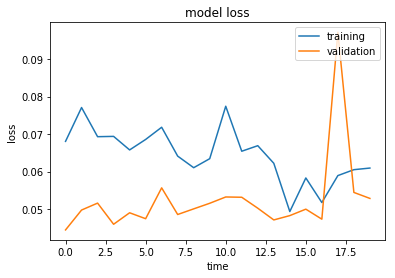

In [62]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('time')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()


### Predicting on Test data

In [55]:
pred = model.predict(x_test)

In [113]:
#predict_classes = np.argmax(pred,axis = 1)
predict_classes = pred.argmax(axis = 1)


In [106]:
# Accuracy
sum(predict_classes==y_test)/len(y_test)

1215

In [107]:
cm = confusion_matrix(y_test,predict_classes)

### Confusion Matrix

Text(0.5, 12.5, 'Predicted label')

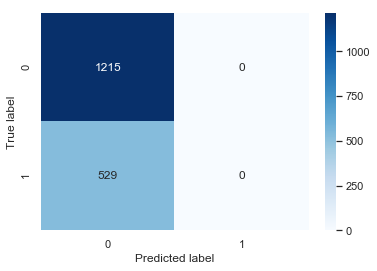

In [108]:
sns.heatmap(confusion_matrix(y_test,predict_classes),annot=True,fmt='d',cmap="Blues") 
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [109]:
def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    """Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.
    
    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix. 
        Similarly constructed ndarrays can also be used.
    class_names: list
        An ordered list of class names, in the order they index the given confusion matrix.
    figsize: tuple
        A 2-long tuple, the first value determining the horizontal size of the ouputted figure,
        the second determining the vertical size. Defaults to (10,7).
    fontsize: int
        Font size for axes labels. Defaults to 14.
        
    Returns
    -------
    matplotlib.figure.Figure
        The resulting confusion matrix figure
    """
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    return fig

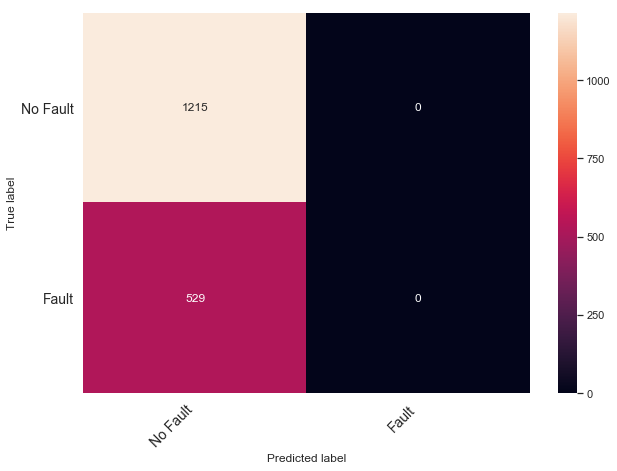

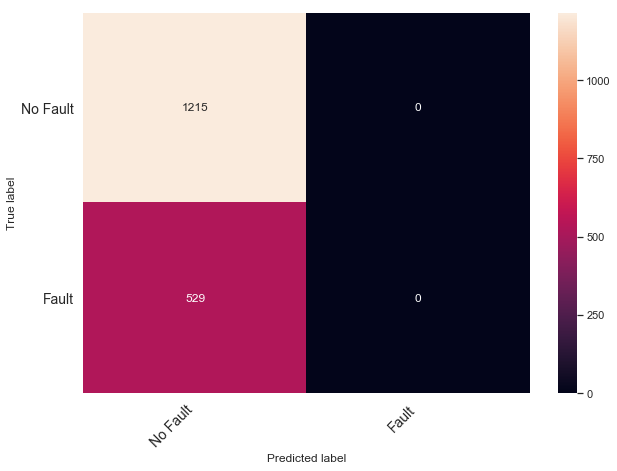

In [114]:
print_confusion_matrix(cm,['No Fault','Fault'])

### Saving trained model

In [22]:
model.save('lstm_v1.h5')

NameError: name 'model' is not defined

### Loading model

In [23]:
model = load_model('lstm_v1.h5')

# Close Environment File

In [24]:
environment.close()